In [ ]:
#install scikit-learn in terminal
pip install -U scikit-learn

## Loading 

In [1]:
# convetional way to import pandas and other necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
column_names = ["Population", "Profit"]
data = pd.read_csv('ex1data1.txt', names = column_names)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
print("Shape:", data.shape)

Shape: (97, 2)


In [5]:
print("\nFeatures:", data.columns)


Features: Index(['Population', 'Profit'], dtype='object')


In [6]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values

In [7]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [8]:
data.shape

(97, 2)

## Visualization
using both <strong> matplot </strong> and <strong> Seaborn </strong>

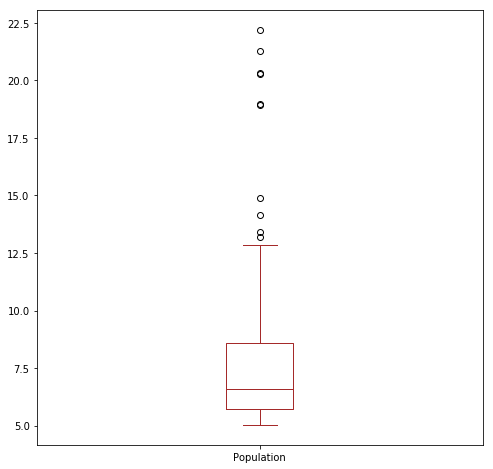

In [9]:
# using matplot
data.Population.plot(kind='box', figsize=(8,8), color='brown')

In [10]:
# conventional way to import seaborn
import seaborn as seabornInstance
import seaborn as sns

#allow plots to appear within the notebook
%matplotlib inline


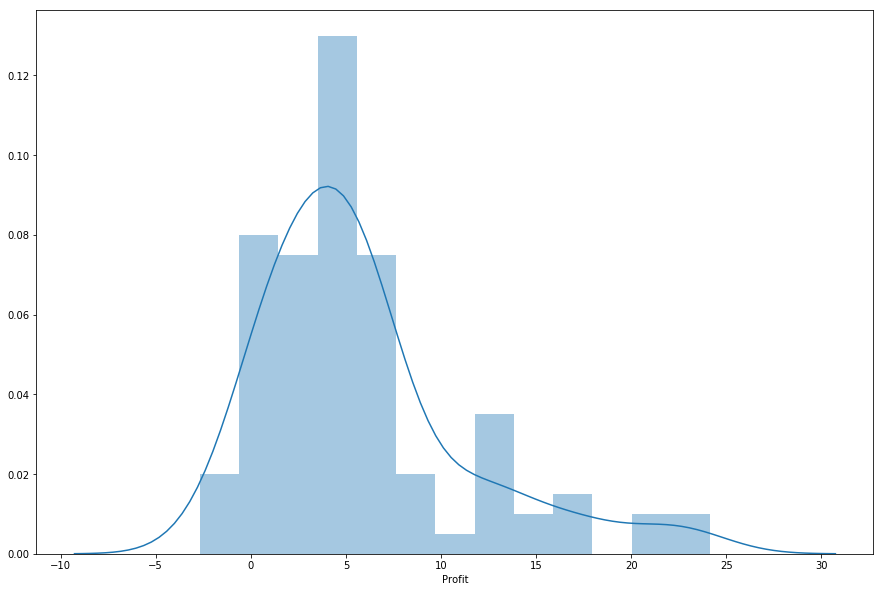

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['Profit'])
plt.show()

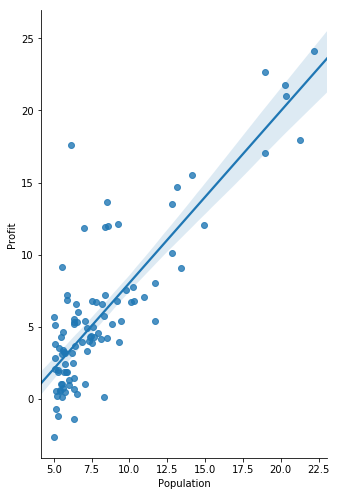

In [12]:
#visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars='Population', y_vars='Profit', size=7, aspect=0.7, kind='reg')

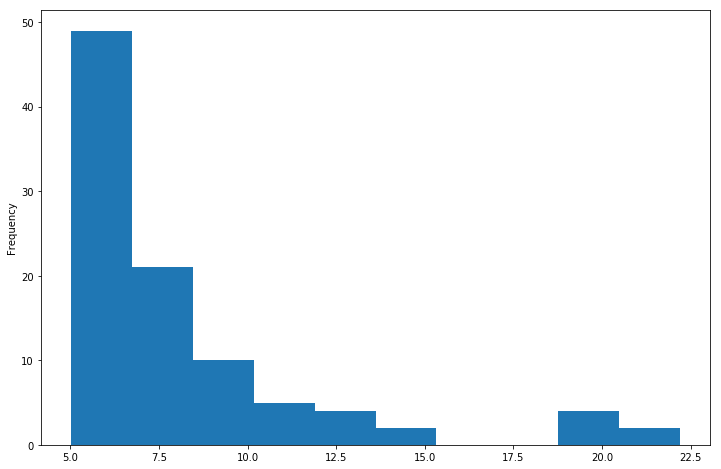

In [13]:
# Visualizing with Histogram
data.Population.plot(kind='hist', figsize=(12,8))

## Linear Regression

In [14]:
# Training our model

In [15]:
#input values -xs and 1s
nrows = data.shape[0]
ncols = data.shape[1]

X = data.loc[:, 'Population'].values #converts to numpy array
y = data.loc[:, 'Profit'].values

X = x.reshape(nrows, 1)
y = y.reshape(nrows, 1)

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression(normalize=True)

#it the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[-4.7323976]
[[1.28752876]]


Exploring our data

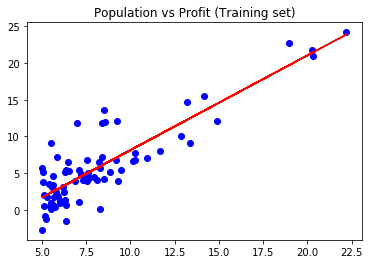

In [19]:
y_pred =linreg.predict(X_train)
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, y_pred, color='red')
plt.title('Population vs Profit (Training set)')
plt.show()

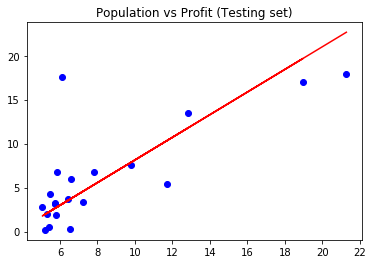

In [20]:
y_pred_test =linreg.predict(X_test)
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test, y_pred_test, color='red')
plt.title('Population vs Profit (Testing set)')
plt.show()

Predicting the data

In [21]:
df=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted': y_pred_test.flatten()})

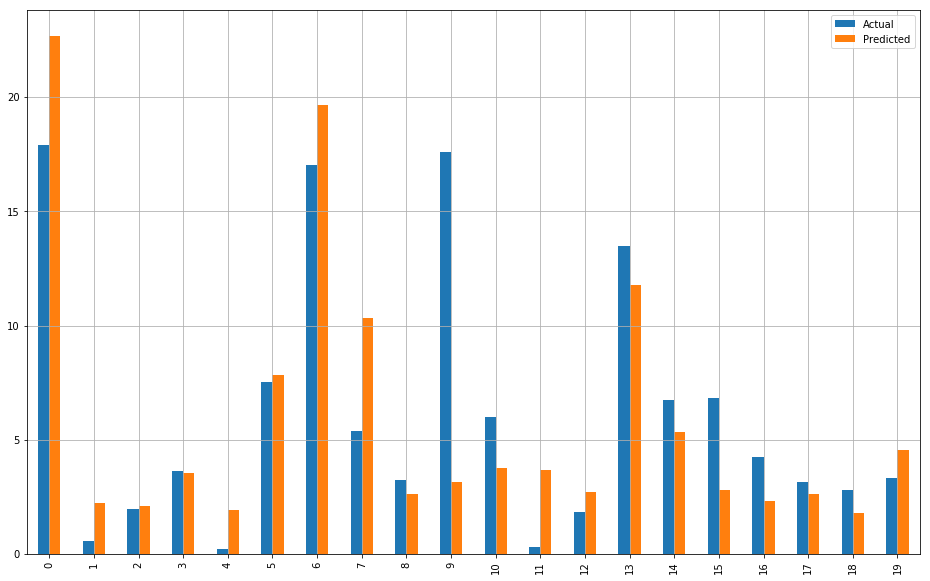

In [22]:
df1=df.head(20)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.8')
plt.grid(which='minor', linestyle=':', linewidth='0.8')
plt.show()

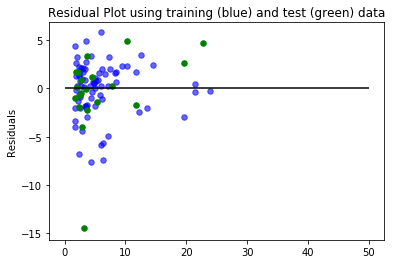

In [26]:
plt.scatter(y_pred, y_pred-y_train, c='b', s=30, alpha=0.6)
plt.scatter(linreg.predict(X_test), linreg.predict(X_test)-y_test, c='g', s=30)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

## Model evaluation metrics for regression

In [27]:
# Calculate Mean Absolute Error using scikit-learn
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred))

Mean Absolute Error:  2.0909119200279


In [28]:
# Calculate Mean Squared Error using scikit-learn

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred))

Mean Squared Error:  7.371424850864131


In [29]:
# Calculate Root Mean Squared Error using scikit-learn

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Root Mean Squared Error:  2.7150368046978905


#For y_test

In [30]:
# Calculate Mean Absolute Error using scikit-learn
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_test))

Mean Absolute Error:  2.4849697479798394


In [31]:
# Calculate Mean Squared Error using scikit-learn

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_test))

Mean Squared Error:  15.709362447765178


In [32]:
# Calculate Root Mean Squared Error using scikit-learn

print('Mean Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Root Mean Squared Error:  3.963503809480341
